# Mutual Information Between Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

In [3]:

env_names = ['hopper', 'halfcheetah', 'walker2d']
dataset_name = 'medium'
seed = 666
batch_size = 100

color_map = {
    'hopper': (0.733, 0.737, 0.870),
    'halfcheetah': (0.372, 0.537, 0.537),
    'walker2d': (0.627, 0.352, 0.470)
}

ylabel_map = {
    'state': r'$\hat{I}(S; T)$',
    'rtg': r'$\hat{I}(\hat{R}; T)$'
}

state_rtg = ['state', 'rtg']

mi_action_dict = {}
for sr in state_rtg:

    mi_action_list = []
    for env_name in env_names:

        mi_action = np.load(f'./results/mi_data_{sr}_action_{env_name}_{dataset_name}_{seed}_{batch_size}.npy', allow_pickle=True)
        mi_action_np = [float(mi.cpu().numpy()) for mi in mi_action]
        mi_action_list.append(mi_action_np)

    mi_action_dict[sr] = mi_action_list

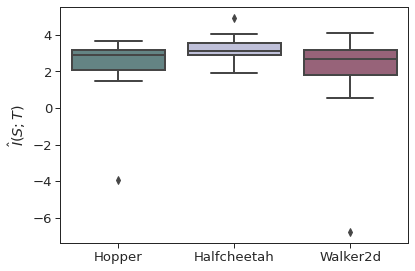

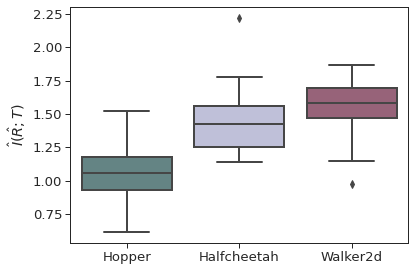

In [7]:
y_labels = {'state': r'$\hat{I}(S; T)$', 'rtg': r'$\hat{I}(\hat{R}; T)$'}
for data_type in state_rtg:
    df = pd.DataFrame({"Hopper": mi_action_dict[data_type][0],
                       "Halfcheetah": mi_action_dict[data_type][1],
                       "Walker2d": mi_action_dict[data_type][2]
                      })
    sns.boxplot(data=df, palette={"Hopper": (0.372, 0.537, 0.537), "Halfcheetah": (0.733, 0.737, 0.870), "Walker2d": (0.627, 0.352, 0.470)})
    plt.ylabel(y_labels[data_type])
    plt.tight_layout()
    plt.savefig(f'figs/mi_data_{data_type}_action_{dataset_name}_{seed}_{batch_size}.pdf')
    plt.show()